# Sesión de ejercicios 5

## Integrantes:
  - Freddy Abad L.
  - Edisson Reinozo T.

La practica se desarrollo en Google Colab, por lo cual , puede preferirse su lectura en esta, mediante el siguiente link: https://colab.research.google.com/drive/1X4BQsSuH7XnC-TYIGN0sDcbnxDJ93RYv?usp=sharing

<hr>

El objetivo de esta sesión de ejercicios es que el alumno pueda ejecutar tareas de sumarización de textos y análisis de sentimientos considerando la metodología adecuada.

Lineamientos generales:
- Responder a detalle las preguntas planteadas a lo largo del este documento
- Sólo mostrar en pantalla los resultados finales (los resultados intermedios no deberán mostrarse, ya que no son informativos)
- Si cuando corre su código obtiene cientos de líneas de warnings, deberá confirugar su notebook para que no muestre estos mensajes (esto dificulta tremendamente la revisión de los trabajos)
- Al momento de mostrar resultados, darle una estructura de orden o formato para facilitar el proceso de revisión (no muestre directamente listas, arrays, o diccionarios sin formato)

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Ejercicio 1

El objetivo de este ejercicio es realizar summarización de textos mediante una técnica simple extractiva. Para ello, se deberán seguir en orden el siguiente listado de tareas:

1. Generar un archivo .txt con un texto de varias oraciones en el idioma inglés > 40
2. Abrir el archivo y crear una lista en donde, en cada posición de la misma, existan oraciones individuales. 

In [2]:
# Text from https://www.bbc.com/future/article/20210209-the-greatest-security-threat-of-the-post-truth-age
file = open("ejercicio1.txt", "r")
text=file.read()
text=text.replace('\n\n','.')
text=text.replace('\n','.')
text=text.replace('..','.')
text=text.replace('.".','.')
text_list = text.split(".")
text_list.remove("")
text_list.remove(" ")
len(text_list)

67


3. Cree una matriz cuadrada $D$ i.e. $n \times n$ donde $n$ representa la cantidad de oraciones en el archivo, y $D_{i,j}$ contiene un valor similitud entre la oración $i$ y la oración $j$. Este valor de similitud se calculará usando la métrica de similitud del coseno. Para mejorar el proceso de comparación, se eliminaran las stopwords de las oraciones a comparar. Adicionalmente, $D_{i,j} = 0, i=j$

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(text_list)

size = len(text_list)
D = np.empty((size, size), dtype=float)

for i in range(size):
  for j in range(size):
    distance = float(1 - cosine_similarity(X[i], X[j]))
    if (i == j):
      distance = 0
    D[i][j] = distance

4. El paquete `networkx` implementa funciones para trabajar con grafos. Utilice el código a continuación para encontrar el valor de relevancia de las oraciones mediante el método `pagerank`:


In [4]:
import networkx as nx

grafo_similaridd = nx.from_numpy_array(D) 
pg_scores = nx.pagerank(grafo_similaridd)



5. Ordenar las oraciones en base a su ranking y seleccionar las $k$ oraciones ($k << n$) con más ranking para formar el resumen. El valor de $k$ puede ser seleccionado mediante prueba y error

In [5]:
def sortFun(e):
  return e[1]

scores = list(pg_scores.items())
scores.sort(key=sortFun, reverse=True)

k = 11

resumen = []
for score in scores[:k]:
  index = score[0]
  resumen.append(text_list[index])

resumen

['What does this all mean?',
 '1: Attention scarcity',
 ' So, when the next pandemic comes along, co-operation across society becomes impossible',
 ' However, there remains significant vaccine hesitancy around the globe',
 'However, modern information technologies can undermine those tricks',
 '3: Erosion of trust',
 'Episteme is a Greek philosophical term, meaning "to know"',
 '3: Adversaries and blunderers',
 ' Our limited capacity for attention is simply spread too thin',
 'Filter bubbles can lead to communities living side-by-side with radically different beliefs (Credit: Wang Zhao/Getty Images)',
 '2: Filter bubbles and bounded rationality']


6. Analice el resumen resultante, ¿Se lo puede considerar un buen resumen del texto original?

El articulo utilizado habla sobre la *seguridad epistémica*. Sobre como la abundancia de información, burbujas de información y la erosión de la verdad son cada vez más frecuentes y las consecuencias que estas traen.

Basados en esto existen algunos considereaciones interesantes sobre las oraciones seleccionadas:

* Se seleccionó la definición de uno de los terminós más utilizados en el texto:
  - 'Episteme is a Greek philosophical term, meaning "to know"',

*   Se seleccionaron **TODOS** los sub-titulos del documento
  - '1: Attention scarcity', 
  - '3: Erosion of trust',
  - '3: Adversaries and blunderers',
  -  '2: Filter bubbles and bounded rationality'


* Se seleccionó la idea principal de dos de los subtitulos
  - La idea principal de: '1: Attention scarcity'
    - ' Our limited capacity for attention is simply spread too thin',
  - La idea principal del subitulo " Filter bubbles and bounded rationality"
    - 'Filter bubbles can lead to communities living side-by-side with radically different beliefs (Credit: Wang Zhao/Getty Images)']

*   Se seleccionó una de sus conclusiones
  - ' So, when the next pandemic comes along, co-operation across society becomes impossible',


De todas las oraciones obtenidas solamente las 2 no aportan información:
- 'What does this all mean?',
- 'However, modern information technologies can undermine those tricks',



7. ¿Metodológicamente, existe algún proceso que se pueda realizar para mejorar los resultados?

Se pudieron haber explorado las siguientes alternativas:

*   Eliminar más signos de puntuación
*   Utilizar n-gramas en el analisis TF-IDF
*   Utilizar otras medidas de similaridad


<hr>

## Ejercicio 2

El siguiente ejercicio tiene por objeto determinar la variación de opiniones en función del tiempo sobre un tema en específico. Para ello, se extraerán publicaciones de internet sobre dos temas en particular (1) Trump y (2) Biden. Con las publicaciones extraídas, se procederá a realizar un análisis de sentimientos para generar una serie de tiempo con estos valores.

Para este ejercicio, se deberán seguir los siguientes pasos:

 **1.** Realizar Webscraping tomando como base la siguiente dirección: `https://www.businesstimes.com.sg/search/trump?page=1`. Donde `trump` indica el tema a buscar y `page=i` indica el número de página de búsqueda (donde $i>0, i \in \mathbb{Z}$). Se deberán extraer las publicaciones de las primeras 15 páginas de búsqueda ($1 \le i \le 15$)


In [6]:
pip install requests

El web scrapping **no se puede ejecutar en esta URL**, ya que el contenido se carga dinamicamente, razon por la cual al ejecutar find_all() que selecciona las secciones para la extracción de información no se obtiene resultado. 

El html a analizar unicamente muestra la función Javascript que se ejecuta en el Explorador, es decir todo el contenido esta limitado, y no se puede hacer un web scrapping de tal.


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
URL = 'https://www.businesstimes.com.sg/search/trump?page=15'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
soup.find_all("div", class_= "media")
# print(soup.prettify())

[]

###### **SOLUCIÓN WEBSCRAPPING**

Al ser un requerimiento fundamental, ya que sin los datos no se puede ejecutar el analizador de sentimientos, se procedio a la extracción manual de los datos, y guardarlos en formato JSON. 

Este proceso se realizo en el caso de análisis Trump y Biden.

In [8]:
# Apertura del archivo
import json
file = open("trump150.json", "r")
trump = file.read()
trump = json.loads(trump)

2. Se deberá filtrar contenido no informativo y stopwords de cada una de las publicaciones extraídas.


In [9]:
# Filtrado de Stop Words
import nltk
from nltk.corpus import stopwords  
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  

for doc in trump:
  filtered_doc = [w for w in doc['text'].split(' ') if not w in stop_words]  
  doc['text'] = ' '.join(filtered_doc)

# trump[0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


3. Se deberá almacenar la fecha de la publicación.


In [10]:
# Cast de la fecha como texto a timestamp
import time
import datetime

for doc in trump:
  timestamp = time.mktime(datetime.datetime.strptime(doc['date'], "%d %b %Y").timetuple())
  doc['timestamp'] = timestamp

# trump[0]

4. Se deberá determinar, para cada publiación, su nivel de sentimiento positivo, negativo, neutral, y compuesto. Para esta tarea, se podrá utilizar la función `SentimentIntensityAnalyzer` del paquete `nltk.sentiment.vader` (averiguar su funcionamiento). 


In [11]:
pip install  vaderSentiment

In [12]:
# Analisis de Sentimiento
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentimentAnalyzer = SentimentIntensityAnalyzer()

for doc in trump:
  kvp = sentimentAnalyzer.polarity_scores(doc['text'])
  doc['sentiment'] = kvp

# trump[0]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


5. Generar un gráfico de líneas en donde se aprecia la evolución de los sentimientos en función del tiempo. Genere cualquier otro tipo de gráfico que ayude a analizar esta información.


**Aclaración**

Para la grafica de líneas previo el análisis de la evolución de sentimientos, se debe procesar los dias con mas de una noticia (promediando los valores), así se obtiene una grafica mas limpia y entendible.

In [13]:
# Promedio en días donde hay multiples artículos
trump_sentiment_dict = {}
for doc in trump:
  timestamp = int(doc['timestamp'])
  if trump_sentiment_dict.get(timestamp,False):
    trump_sentiment_dict[timestamp]['pos'].append(doc['sentiment']['pos'])
    trump_sentiment_dict[timestamp]['neg'].append(doc['sentiment']['neg'])
    trump_sentiment_dict[timestamp]['neu'].append(doc['sentiment']['neu'])
    trump_sentiment_dict[timestamp]['compound'].append(doc['sentiment']['compound'])
  else:
    trump_sentiment_dict[timestamp] = {}
    trump_sentiment_dict[timestamp]['pos'] = [doc['sentiment']['pos']]
    trump_sentiment_dict[timestamp]['neg'] = [doc['sentiment']['neg']]
    trump_sentiment_dict[timestamp]['neu'] = [doc['sentiment']['neu']]
    trump_sentiment_dict[timestamp]['compound'] = [doc['sentiment']['compound']]
    

trump_sentiment = []
for item in list(trump_sentiment_dict.items()):
  timestamp = item[0]
  sentiment = {
      'pos': sum(item[1]['pos']) / len(item[1]['pos']),
      'neg': sum(item[1]['neg']) / len(item[1]['neg']),
      'neu': sum(item[1]['neu']) / len(item[1]['neu']),
      'compound': sum(item[1]['compound']) / len(item[1]['compound'])
  }
  trump_sentiment.append((timestamp, sentiment))

# trump_sentiment

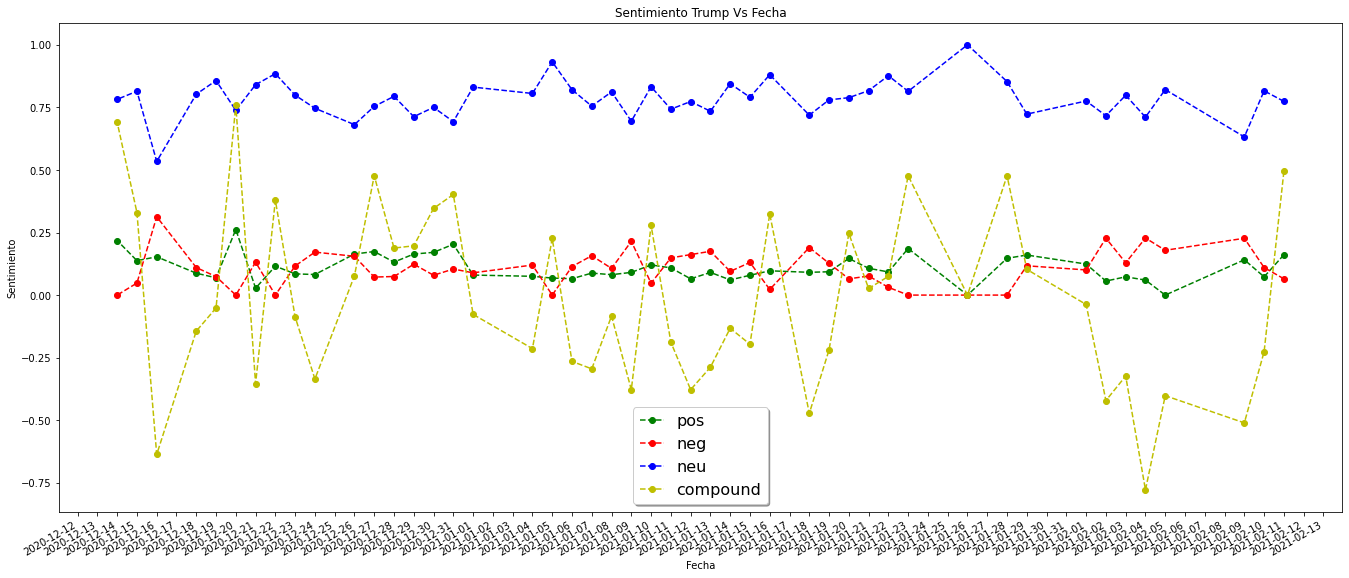

In [14]:
#Grafica
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

plt.rcParams["figure.figsize"] = (23,10)
dates_1=[datetime.datetime.fromtimestamp(timestamp).strftime('%d/%m/%Y') for (timestamp, sent) in trump_sentiment]
dates= [datetime.datetime.strptime(d,'%d/%m/%Y').date() for d in dates_1]
sent_positive = [sent['pos'] for (timestamp, sent) in trump_sentiment]
sent_neg = [sent['neg'] for (timestamp, sent) in trump_sentiment]
sent_neu = [sent['neu'] for (timestamp, sent) in trump_sentiment]
sent_compound = [sent['compound'] for (timestamp, sent) in trump_sentiment]

plt.plot(dates, sent_positive,'--go')
plt.plot(dates, sent_neg,'--ro')
plt.plot(dates, sent_neu,'--bo')
plt.plot(dates, sent_compound,'--yo')

plt.legend(('pos', 'neg', 'neu', 'compound'),
           shadow=True,
           handlelength=1.5, fontsize=16)

plt.title('Sentimiento Trump Vs Fecha')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()
plt.xlabel('Fecha')
plt.ylabel('Sentimiento')
plt.show()

**Análisis de resultados**

Los resultados arrojan que los articulos analizados son mayormente neutros cuando se tiene temáticas 'Trump'. Las razones de esto se debe, al tipo de lenguaje que usan los medios escritos. El periodico en analisis, es mayormente de temas economicos, por tal, no politiza sus articulos y por ende su lenguaje.

Sin embargo se puede notar: 

Incremento en **opiniones negativas** los dias: 
*   12/Diciembre/2020 -> Endurecimiento del Partido Republicano a la postura de no reconocimiento de las elecciones.
*   6/Enero/2021 -> Banneo de Aplicaciones Chinas
*   7-9/Enero/2021 -> Protestas post Toma de Capitolio y la propuesta de 2do Impeachment.

Incremento en **opiniones positivas** los dias:
*   19/Diciembre/2021 -> Propuesta de salida de empresas chinas
*   20/Diciembre/2021 -> Firma Tratados Mineras-Energeticas 

En este caso, no se puede hacer un analisis sobre elecciones, ya que el rango de noticias es de mediados de Diciembre/2020, aproximadamente 1 mes despues de las elecciones.

<hr>



6. Repita el proceso anterior, esta vez utilizando como tema `biden`. ¿Existe algún patrón que explique los resultados finales de la elección presidencial de EEUU?

In [15]:
# Importar documentos
file = open("biden150.json", "r")
biden = file.read()
biden = json.loads(biden)

In [16]:
# Filtrado de Stop Words
for doc in biden:
  filtered_doc = [w for w in doc['text'].split(' ') if not w in stop_words]  
  doc['text'] = ' '.join(filtered_doc)
# biden[0]

In [17]:
# Convertir fecha en timestamp
for doc in biden:
  timestamp = time.mktime(datetime.datetime.strptime(doc['date'], "%d %b %Y").timetuple())
  doc['timestamp'] = timestamp

In [18]:
# Analizar y guardar el sentimiento de cada documento
for doc in biden:
  kvp = sentimentAnalyzer.polarity_scores(doc['text'])
  doc['sentiment'] = kvp
# biden[0]

In [19]:
# Encontramos el valor de sentimiento promedio cuando hay más de una noticia por día
biden_sentiment_dict = {}
for doc in biden:
  timestamp = int(doc['timestamp'])
  if biden_sentiment_dict.get(timestamp,False):
    biden_sentiment_dict[timestamp]['pos'].append(doc['sentiment']['pos'])
    biden_sentiment_dict[timestamp]['neg'].append(doc['sentiment']['neg'])
    biden_sentiment_dict[timestamp]['neu'].append(doc['sentiment']['neu'])
    biden_sentiment_dict[timestamp]['compound'].append(doc['sentiment']['compound'])
  else:
    biden_sentiment_dict[timestamp] = {}
    biden_sentiment_dict[timestamp]['pos'] = [doc['sentiment']['pos']]
    biden_sentiment_dict[timestamp]['neg'] = [doc['sentiment']['neg']]
    biden_sentiment_dict[timestamp]['neu'] = [doc['sentiment']['neu']]
    biden_sentiment_dict[timestamp]['compound'] = [doc['sentiment']['compound']]
    

biden_sentiment = []
for item in list(biden_sentiment_dict.items()):
  timestamp = item[0]
  sentiment = {
      'pos': sum(item[1]['pos']) / len(item[1]['pos']),
      'neg': sum(item[1]['neg']) / len(item[1]['neg']),
      'neu': sum(item[1]['neu']) / len(item[1]['neu']),
      'compound': sum(item[1]['compound']) / len(item[1]['compound'])
  }
  biden_sentiment.append((timestamp, sentiment))

# biden_sentiment[0]

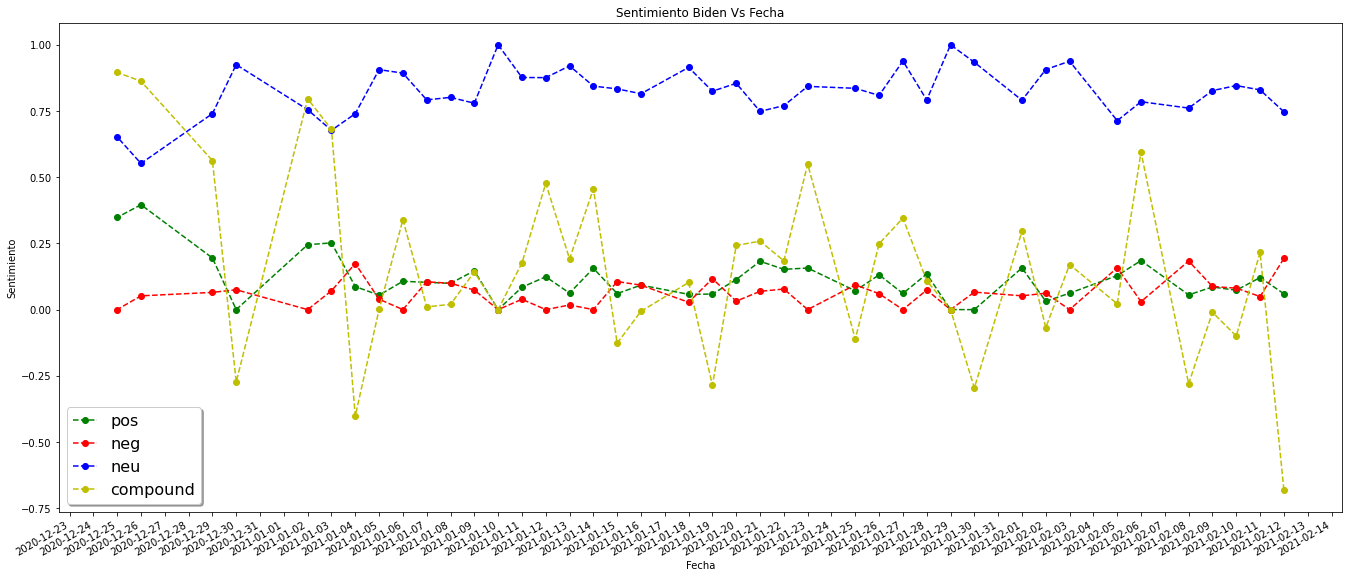

In [20]:
# Graficamos
plt.rcParams["figure.figsize"] = (23,10)
dates_1=[datetime.datetime.fromtimestamp(timestamp).strftime('%d/%m/%Y') for (timestamp, sent) in biden_sentiment]
dates= [datetime.datetime.strptime(d,'%d/%m/%Y').date() for d in dates_1]
sent_positive = [sent['pos'] for (timestamp, sent) in biden_sentiment]
sent_neg = [sent['neg'] for (timestamp, sent) in biden_sentiment]
sent_neu = [sent['neu'] for (timestamp, sent) in biden_sentiment]
sent_compound = [sent['compound'] for (timestamp, sent) in biden_sentiment]

plt.plot(dates, sent_positive,'--go')
plt.plot(dates, sent_neg,'--ro')
plt.plot(dates, sent_neu,'--bo')
plt.plot(dates, sent_compound,'--yo')

plt.legend(('pos', 'neg', 'neu', 'compound'),
           shadow=True,
           handlelength=1.5, fontsize=16)

plt.title('Sentimiento Biden Vs Fecha')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()
plt.xlabel('Fecha')
plt.ylabel('Sentimiento')
plt.show()

**Análisis de resultados**

En este caso, no se puede hacer un analisis sobre elecciones, ya que el rango de noticias es de la ultima semana de Diciembre/2020, aproximadamente 1 mes despues de las elecciones.

Además, en el rango de tiempo de 23/Dic/2020 - 11/02/2021,  los resultados arrojan que los articulos analizados son mayormente neutros cuando se tiene keywords 'Biden'.  Las razones de esto se debe, al tipo de lenguaje que usan los medios escritos. El periodico en analisis, es mayormente de temas economicos, por tal, no politiza sus articulos y por ende su lenguaje.

Adicionalmente se puede notar: 

*   Incremento en **opiniones negativas** los dias: 

  *   04/Ene/2021 -> Viaje de Trump a Georgia para cambiar los resultados electorales. Este item si bien trata de Trump, esta bajo la etiqueta de Biden.
  *   12/Feb/2021 -> Reunion China-EEUU sobre acciones en contra de politicas economicas injustas de China y el abuso de Derechos Humanos en China. 

*   Incremento en **opiniones positivas** los dias:

  *   25/Dic/2020 -> Anuncio de Acuerdos Comerciales. Sin embargo, esto muestra la limitaciones en la capacidad de analisis semantico ya que, califica de manera positiva los acuerdos entre compañias, pero, aclara que a "Biden no le gusta".
  *   21/Ene/2021 -> Anuncio de entrega de dinero, para combatir a la pobreza causada por la pandemia.

<hr>

